# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv('customers.csv')
    data.drop(['Region', 'Channel'], axis=1, inplace=True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [45, 123, 187]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns=data.keys()).reset_index(drop=True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5181,22044,21531,1740,7353,4985
1,11170,10769,8814,2194,1976,143
2,2438,8002,9819,6269,3459,3


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

### Answer:

Sample 0: Fresh is less than mean and within 1 std below the mean and it layes in the 50% percentile. Milk is above the the mean and within 3 std above the mean and it layes within the 100% percentile. Grocery is above the mean and within 2 std above the mean and it layes within the 100% percentile. Frozen is less than the mean and within 1 std below the mean and it layes within 75% percentile. Detergents_Paper is above the mean and within 2 std above the mean and it layes in the 100% percentile. Delicatessen is above the mean and within 2 std above the mean and it layes in the 100% percentile.
    
From the statistical description, it is clear this customer focus on Milk, Grocery, Detergents_paper, and Delicatessen. So, I think this customer represents a market.
    
    
    
Sample 1: Fresh is less than mean but within 1 std below the mean and it layes in the 75% percentile. Milk is above the the mean and within 1 std above the mean and it layes within the 100% percentile. Grocery is above the mean and within 1 std above the mean and it layes within the 75% percentile. Frozen is less than the mean and within 1 std below the mean and it layes within 75% percentile. Detergents_Paper is less than mean and within 1 std below the mean and it layes in the 75% percentile. Delicatessen is less than the mean and within 1 std below the mean and it layes in the 25% percentile.
    
From the statistical description, it is clear this customer focus on Milk, and Grocery. So, I think this customer represents a cafe.
     
     
     
Sample 2: Fresh is less than mean and within 1 std below the mean and it layes in the 25% percentile. Milk is above the mean and within 1 std above the mean and it layes within the 100% percentile. Grocery is above the mean and within 1 std above the mean and it layes within the 75% percentile. Frozen is above the mean and within 1 std above the mean and it layes within 100% percentile. Detergents_Paper is above the mean and within 1 std above the mean and it layes in the 75% percentile. Delicatessen is less than the mean and within 1 std below the mean and it is equal to the minimum value.
    
From the statistical description, it is clear this customer focus on Milk, Grocery, Frozen, Detergent_paper. So, I think this customer represents a retailer.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split

for feature in data.keys():
    
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(feature, axis=1)
    
    # TODO: Split the data into training and testing sets using the given feature as the target 
    x_train, x_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25, random_state=25)
    
    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=25)
    regressor.fit(x_train, y_train)
    
    # TODO: Reprot the score of the prediction using the testing set
    score = regressor.score(x_test, y_test)
    print "Score of {}: {}".format(feature, score)

Score of Fresh: -0.821239082915
Score of Milk: 0.0454966986872
Score of Grocery: 0.810787026152
Score of Frozen: 0.0291175118307
Score of Detergents_Paper: 0.744682803266
Score of Delicatessen: -2.69979255867


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

### Answer:

As the number of features is small, just 6 features, I predicted the score of all features.
The result of R2 is reported above. 

From the results above, the R2 score for Fresh, Milk, Frozen, and Delicatessen are very low. This mean the model failed to fit the data. Also, this mean these feature are very necessary to determine customer habits. They are strongly relevant.

The R2 scores for Grocery and Detergents_paper are high which mean model were able to fit the data and predict them.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21f2311890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f21b68f3050>]], dtype=object)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


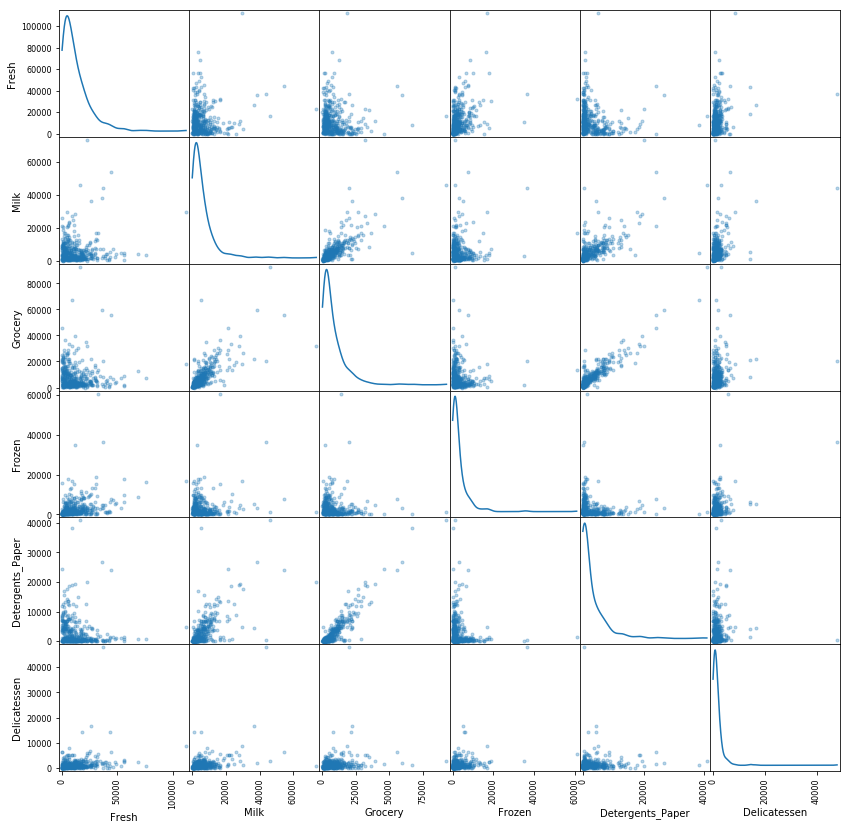

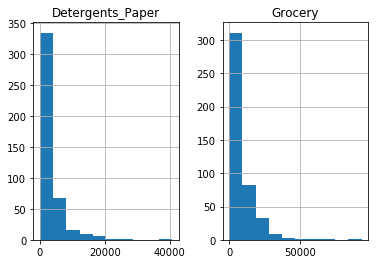

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha=0.3, figsize=(14,14), diagonal='kde')
display(data[['Grocery', 'Detergents_Paper']].hist())
display(data.corr())

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

### Answer

Yes, there is a pair of features that look correlated. These two features are Grocery and Detergents_paper.
This confirms my suspicions about their relevance to the data. Also, as it is shown from the correlation matrix,  there is not strong correlation between Milk and Crocerys, and Milk and Detergents_Paper.

The type of distribution is log normal distribution. The histogram above shows where most of the data points lie for the two features. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21b6897c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f21b7843110>]], dtype=object)

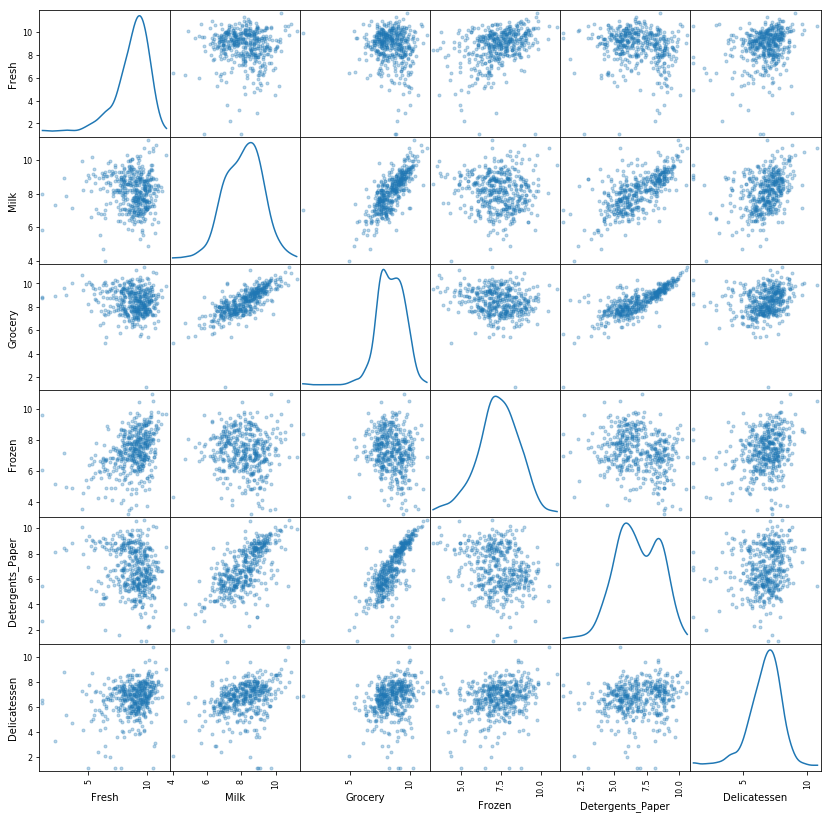

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha=0.3, figsize=(14,14), diagonal='kde')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.552753,10.000796,9.977249,7.461640,8.902864,8.514189
1,9.320987,9.284427,9.084097,7.693482,7.588830,4.962845
2,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    feature_outliers = log_data[~ ((log_data[feature]>=Q1-step) & (log_data[feature]<=Q3+step))]
    outliers.extend(feature_outliers.index)
    
    print "\n'{}' has {} data points considered outliers".format(feature, len(feature_outliers))
    display(data.loc[feature_outliers.index.values])
    
    
# Removing the outliers, if any were specified
# good_data = log_data.drop(log_data.index[outliers]).reset_index(drop=True)
good_data = log_data.drop(log_data.index[[65, 66, 128, 154, 75]]).reset_index(drop=True)

# Keeping the outliers
# good_data = log_data
print "\nGood data shape: ", good_data.shape


'Fresh' has 16 data points considered outliers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
81,219,9540,14403,283,7818,156
95,3,2920,6252,440,223,709
96,23,2616,8118,145,3874,217
128,140,8847,3823,142,1062,3
171,200,25862,19816,651,8773,6250
193,180,3485,20292,959,5618,666
218,18,7504,15205,1285,4797,6372
304,161,7460,24773,617,11783,2410



'Milk' has 4 data points considered outliers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,22925,73498,32114,987,20070,903
98,503,112,778,895,56,132
154,622,55,137,75,7,8
356,22686,134,218,3157,9,548



'Grocery' has 2 data points considered outliers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,20398,1137,3,4407,3,975
154,622,55,137,75,7,8



'Frozen' has 10 data points considered outliers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,4591,15729,16709,33,6956,433
57,5417,9933,10487,38,7572,1282
65,85,20959,45828,36,24231,1423
145,22039,8384,34792,42,12591,4430
175,2343,7845,11874,52,4196,1697
264,1073,9679,15445,61,5980,1265
325,32717,16784,13626,60869,1272,5609
420,4456,5266,13227,25,6818,1393
429,8607,1750,3580,47,84,2501
439,2787,1698,2510,65,477,52



'Detergents_Paper' has 2 data points considered outliers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,20398,1137,3,4407,3,975
161,12434,540,283,1092,3,2233



'Delicatessen' has 14 data points considered outliers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,9,1534,7417,175,3468,27
109,1406,16729,28986,673,836,3
128,140,8847,3823,142,1062,3
137,3087,8080,8282,661,721,36
142,37036,7152,8253,2995,20,3
154,622,55,137,75,7,8
183,36847,43950,20170,36534,239,47943
184,327,918,4710,74,334,11
187,2438,8002,9819,6269,3459,3
203,583,685,2216,469,954,18



Good data shape:  (435, 6)


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

### Answer

In total there are 43 outliers data point according to Tukey's Method.
After reviewing this article (http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/), I decided to study these outliers a bit.

The total number of data points in the dataset is 440 sample. The number of outliers is 43, so outliers consists about 10% of the total number of points. Removing them will have big impact on data variance, pca and clustering algorithm.

So, I checking outliers point shared by more than one feature according to the reviewr notes. I found there are 5 outlier points have this property:

    Index  65, between Fresh and Frozen     
    Index  66, between Fresh and Delicatesen 
    Index 128, between Fresh and Delicatesen
    Index  75, between Grocery and Detergents_paper
    Index 154, between Milk, Grocery, and Delicatesen

Finding these outliers in more than one feature increase the confidence that they are very noisy outliers. Removing them will have little impact on the data variance. PCA will be affected a little. The general trends in the main principle components will not change. Just a little change in the weights assigned to each feature. Clustering scores for differnt number of clusters will change but it will not affect which number of clusters is the best. So, I decided to remove them.

One of my sample points which is 187 identified as an outlier by Delicatessen feature. It is not included in the outliers removal list. I am very interested in known which cluster it belonges to.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


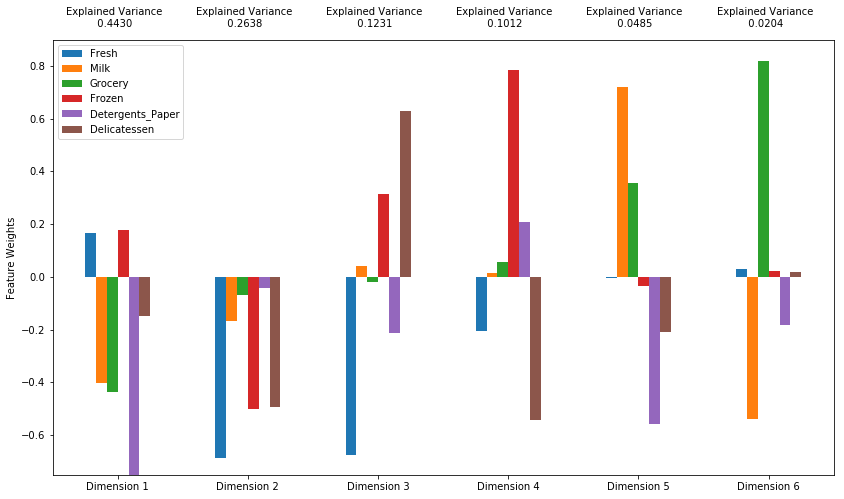

In [13]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
# In this case, there is no need to specify the number of components explicitly
# the number of components will be specified to the number of features by default
pca = PCA().fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
print pca_results['Explained Variance'].cumsum()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

### Answer

The first two principal components  : 0.7068
The first four principal components : 0.9311

The first principal component is giving very high negative weights to Detergent_paper and medium negative weight to Milk, Grocery. I think this principal component represent Hotel.

The second principal component is giving very high negative weights to Fresh, Frozen, and Delicatessen. Also, all other features on the same side. So, I think this principle component represent Retailer.

The thrid principal component is giving a very high negative weight to Fresh, very high positive weight to Delicatessen, and medium positive weight to Frozen. I think this principle component represent restaurant.

The fourth principal component is giving very high positive weight to Frozen and high negative weight to Delicatessen. I think this principle component represent restaurant.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [14]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns=pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-3.2813,-1.3308,0.9322,-0.2862,0.3269,-0.1179
1,-0.9128,0.0198,-1.4805,1.3307,0.9609,-0.2671
2,-0.7503,2.4661,-2.6802,4.6815,1.2507,-0.2193


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [15]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [16]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns=['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-3.2813,-1.3308
1,-0.9128,0.0198
2,-0.7503,2.4661


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

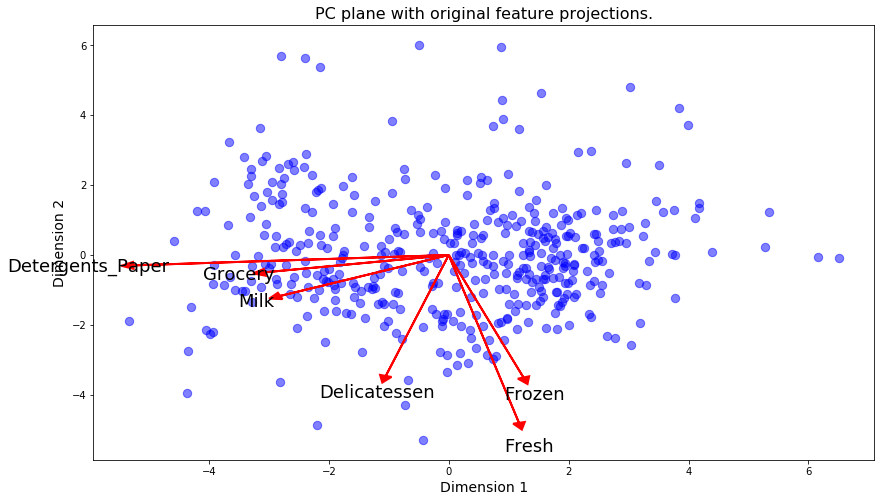

In [17]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

### Answer:

K-Means Clustering Advantages: simple, fast, and efficient with high dimensional data. (https://www.quora.com/What-are-the-advantages-of-K-Means-clustering , https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian)

Gaussian Mixture Advantages: flexible, agnostic. (http://scikit-learn.org/stable/modules/mixture.html)



Hard vs Soft (https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian)

    K-Means: assume each data point belongs to one of the K clusters with 100% confidence. This is called hard-assigment. After some iterations of training, K-Means might find data points classified to belong to one cluster might belong to another cluster. K-Means will change the cluster for these data points and assume they are 100% belong to the new cluster.
    
    Gaussian Mixture: rather than hard-assignment of data points to distinct clusters, Gaussian Mixture works by giving probabilites to each data point express the confidence level of its belonging to a cluster. This is employment of uncertainty is called soft-assignment. This works well if we are not certain about the clusters of the data points. 
    
    
Shape of the Data (https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian)

    K-Means: becuase of the hard-assignment, K-means assume the data is arranged in spherical shapes clusters. So, it does not perferm well with data of complicated geometry.
    
    Gaussian Mixture: because of the soft-assignment, Gaussian Mixture does not assume the data to be arranged in any specific geometry. So, it does perform well with data of complicated geometry.


Selection of the algorithm:

The data set provided is not arranged in spherical shapes based on the projection of data using the first two principal components in the above figure. Also, we are not sure what is the best number of clusters so we need to use uncertainty. So, think Gaussian Mixture is the better than K-means for this problem.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [35]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

best_score = 0
best_n_clusters = 0

for n_clusters in range(2, 21):
    
    score = 0
    # Try differnt value of random state for more robusteness
    for r in range(10):

        # TODO: Apply your clustering algorithm of choice to the reduced data
        clusterer = GaussianMixture(n_components=n_clusters, random_state=r).fit(reduced_data)
    
        # TODO: Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)
    
        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score += silhouette_score(reduced_data, preds)
        
    score /= 10
    print "Silhouette score for {} clusters: {}".format(n_clusters, score)
    
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters
    
# TODO: Apply your clustering algorithm of choice to the reduced data
clusterer = GaussianMixture(n_components=best_n_clusters, random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Find the cluster centers
centers = clusterer.means_

Silhouette score for 2 clusters: 0.422039197318
Silhouette score for 3 clusters: 0.361704700056
Silhouette score for 4 clusters: 0.317859127402
Silhouette score for 5 clusters: 0.280371151384
Silhouette score for 6 clusters: 0.298066863623
Silhouette score for 7 clusters: 0.322385678374
Silhouette score for 8 clusters: 0.3130602971
Silhouette score for 9 clusters: 0.307000771427
Silhouette score for 10 clusters: 0.300064447261
Silhouette score for 11 clusters: 0.304324821548
Silhouette score for 12 clusters: 0.309785605508
Silhouette score for 13 clusters: 0.324111416354
Silhouette score for 14 clusters: 0.329883616863
Silhouette score for 15 clusters: 0.321945690529
Silhouette score for 16 clusters: 0.315085755315
Silhouette score for 17 clusters: 0.30357723453
Silhouette score for 18 clusters: 0.304567125447
Silhouette score for 19 clusters: 0.303516267521
Silhouette score for 20 clusters: 0.310469519373


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

### Answer

The silhouette scores for different number of clusters are reported above.

The best number of clusters according to Silhouette Score is 2.

I have done the experiments without removing the outliers. The best number of clusters is also 2. However the the Silhouette Score for No of clusters 2 and 3 is very close and only differs by few floating points digits.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

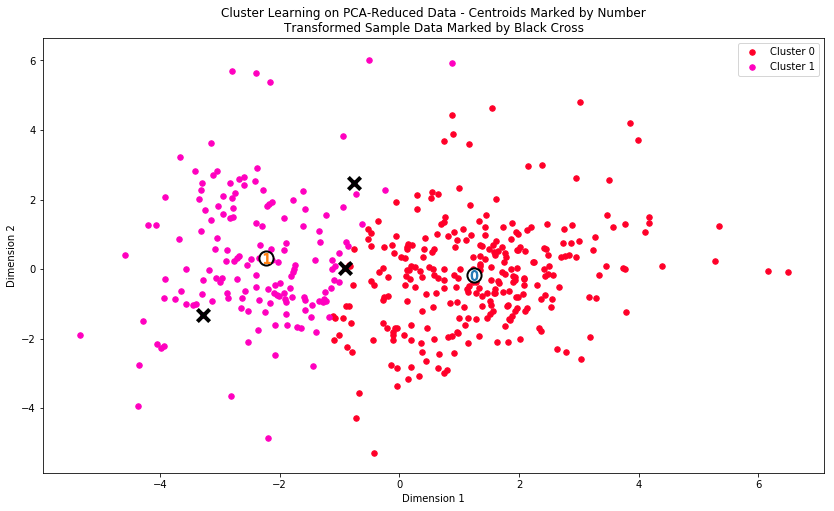

In [36]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [44]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns=data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


### Question 8

Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

### Answer

Segments 0: Fresh is less than the mean and within 1 std below the mean and it layes in the 75% percentile. Milk is less than the mean and within 1 std below the mean and it layes within the 50% percentile. Grocery is less than mean and within 1 std below the mean and it layes within the 50% percentile. Frozen is less than the mean and within 1 std below the mean and it layes within 75% percentile. Detergents_Paper is less than the mean and within 1 std below the mean and it layes in the 50% percentile. Delicatessen is less than the mean and within 1 std below the mean and it layes in the 50% percentile.

From the statistical description, I think this segment represents a retailer.


Segments 1: Fresh is less than the mean and within 1 std below the mean and it layes in the 50% percentile. Milk is more than the mean and within 1 std above the mean and it layes within the 100% percentile. Grocery is more than mean and within 1 std above the mean and it layes within the 100% percentile. Frozen is less than the mean and within 1 std below the mean and it layes within 50% percentile. Detergents_Paper is more than the mean and within 1 std above the mean and it layes in the 100% percentile. Delicatessen is less than the mean and within 1 std below the mean and it layes in the 50% percentile.


From the statistical description, I think this segment represents a restaurant.


A customer who is assigned to Cluster 0 should best identify with the establishments represented by retailer by the feature set of Segment 0

A customer who is assigned to Cluster 1 should best identify with the establishments represented by market or cafe by the feature set of Segment 1

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [45]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


### Answer:

#### Before running the prediction code above:

Sample 0: Fresh is more than Fresh value of segment0 and less than segment1 and it is closer to segment1. Milk is more than the Milk values of segment0 and segment1 and it is closer to segment1. Grocery is more than the Grocery values of segment0 and segment1 and it is closer to segment 1. Frozen is less than the Frozen value of segment0 and more than segment 1 and it is closer to segment segment0. Detergent is more than the Detergent values of segment0 and segment1 and it is closer to segment1. Delicatessen is more than the Delicatessen values of segment0 and segment1 and it is closer to segment1.

    For 5 out of 6 features the sample is closer to segment1. So, I think it belongs to segment1.


Sample 1: Fresh is more than Fresh values of segment0 and segment1 and it is closer to segment0. Milk is more than the Milk values of segment0 and segment1 and it is closer to segment1. Grocery is more than the Grocery value of segment0 and less than segment1 and it is closer to segment 1. Frozen is more than the Frozen value of segment0 and segment1 and it is closer to segment0. Detergent is more than the Detergent value of segment0 and less than segment1 and it is closer to segment0. Delicatessen is less than the Delicatessen values of segment0 and segment1 and it is closer to segment0.

    For 4 out of 6 features the sample is closer to segment0. So, I think it belongs to segment0.


Sample 2: Fresh is less than Fresh values of segment0 and segment1 and it is closer to segment1. Milk is more than the Milk values of segment0 and segment1 and it is closer to segment1. Grocery is more than the Grocery value of segment0 and less than segment1 and it is closer to segment 1. Frozen is less than the Frozen value of segment0 and more than segment1 and it is closer to segment1. Detergent is more than the Detergent value of segment0 and less than segment1 and it is closer to segment1. Delicatessen is less than the Delicatessen values of segment0 and segment1 and it is closer to segment0.

    For 5 out of 6 features the sample is closer to segment1. So, I think it belongs to segment1.


#### After running the prediction code above:
The results of predictions agree with my intuition above

    Sample 0 is in Segment 1
    Sample 1 is in Segment 0
    Sample 2 is in Segment 1


#### Comparing with my Answer in Question 1

    Sample 0 represents market.    Correct, belongs to Segment 1
    Sample 1 represents cafe.      Wrong, belongs to Segment 0
    Sample 2 represents retailer.  Wrong, belongs to Segment 1


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

### Answer

From the project description, we can not assume the change affects all customers equally.


#### Please notice, The following is to derive an insight from the company failed experiment and is not my A/B testing

"
From the project description, the company already tested the change of service to some customers and got positive results. After applying the change to all customers, they got very bad results. This information will help us to see which group of customers will not be affected by the service change and which group of customers will be affected by the service change by following these two steps.


1- Get the information of customers used in the intial testing and check which cluster the majority of customers belong to. lets assume they belong to cluster 0.

2- Customers belong to cluster 0 will not be affected by the change of service. Customers belong to cluster 1 will be affected by the change of service.
"



#### A/B test

My recommendation is to run 4 A/B test across 4 weeks on 20% of customers.
The reason is to remove any days bias such as holidays. The following procedure should be followed:

    1- Each week take  take a randomly 10% of customers that is not used in previous tests and make sure it is equally distributed across clusters. 
    
    2- Divide the 10% set in half and make sure each small subset is equally distributed. The first set will serve as the Control set where the service will not change and the second set will serve as the Experimental set where we will test the change of service. 
    
    3- Analyze the results from Control and Experiments sets. Check the percentage of negative feedback from both group. Identify which cluster the customers of negative feedback belong to. 
    
    After finishing the 4 A/B tests, average the results. The decision should be made on which group will react positivly to the change. In implementing the new change, I would recommend it to be gradual on each 10% of customers and to analyze the results to check if any hidden variable missed by the A/B tests.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

### Answer

we can train the supervised learner on the original data using product spendings as features and the Customer Segment as target variable.

Then use the trained learner to predict which segment the new customers belong to.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

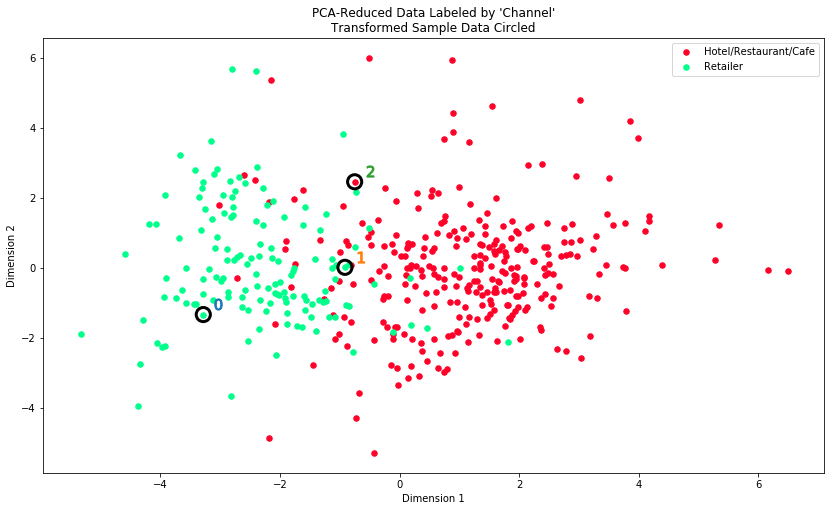

In [51]:
# Display the clustering results based on 'Channel' data
outliers = [65, 66, 128, 154, 75]
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

### Answer

The selected clustering algorithm and number of clusters compare very well with the underlying distribution of customers. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.